# Cellular automata
<style>
table.grid td {
    border: 1px solid black;
}
table.grid tr:nth-child(2n+1) {
    background: none;
}
table.grid tr, table.grid td {
    height: 4em;
    width: 4em;
}
table.grid td {
    text-align: center; 
    vertical-align: middle;
}
.healthy {
    background: #029e73;
}
.infected {
    background: #de8f05;
}
</style>

There is a class of simulation called "[cellular automata](https://en.wikipedia.org/wiki/Cellular_automaton)" which use a set of discrete cells, with rules governing how the values in those cells change over time. The Wikipedia article shows [a number of examples](https://en.wikipedia.org/wiki/Cellular_automaton#Applications) of places that cellular automata are used in research.

The name comes from "cellular" meaning "discrete boxes holding values" and "automaton" meaning "something which moves by itself".

We are going to create a very basic simulation which models the spread of a disease across a population of cells. In order to keep this as simple and understandable as possible, we will be ignoring things like cells moving around, contact time, resistance, etc.

Let's start by modelling our world as a grid. In fact, to keep it even simpler, let's keep it as a one-dimensional array. Each cell in the array is either healthy (<span class="healthy">&nbsp;&nbsp;&nbsp;&nbsp;</span>), or is infected (<span class="infected">&nbsp;&nbsp;&nbsp;&nbsp;</span>).
<table class="grid">
   <tr>
       <td class="healthy"></td>
       <td class="infected"></td>
       <td class="healthy"></td>
       <td class="healthy"></td>
       <td class="infected"></td>
   </tr>
</table>

Since we're working with code, we need to represent our array numerically where `0` is a healthy cell and `1` is an infected cell:
<table class="grid">
   <tr>
       <td class="healthy"><code style="padding: 0.1em; font-size:1.5em;">0</code></td>
       <td class="infected"><code style="padding: 0.1em; font-size:1.5em;">1</code></td>
       <td class="healthy"><code style="padding: 0.1em; font-size:1.5em;">0</code></td>
       <td class="healthy"><code style="padding: 0.1em; font-size:1.5em;">0</code></td>
       <td class="infected"><code style="padding: 0.1em; font-size:1.5em;">1</code></td>
   </tr>
</table>

In [1]:
%%writefile cells.py

import numpy as np

first_array = np.array([0, 1, 0, 0, 1])

Overwriting cells.py


As in the previous chapter, this array is our "state". Instead of a single value per time step, we have an array of values. If we define some rules then we will be able to run the simulation.

The simplest possible rule I can think of for the spread of infection is (and remember we're not aiming for realism here) that **if a healthy cell has an infected cell to its left then it becomes infected**. I.e. the next state of the system would be:

<table class="grid">
   <tr>
       <td class="healthy"><code style="padding: 0.1em; font-size:1.5em;">0</code></td>
       <td class="infected"><code style="padding: 0.1em; font-size:1.5em;">1</code></td>
       <td class="infected"><code style="padding: 0.1em; font-size:1.5em;">1</code></td>
       <td class="healthy"><code style="padding: 0.1em; font-size:1.5em;">0</code></td>
       <td class="infected"><code style="padding: 0.1em; font-size:1.5em;">1</code></td>
   </tr>
</table>

Before we dive in with a full simulation, let's take a small step at a time. Instead of trying to implement the rule and update the state, let's just print some variables and see what's happening.

In [2]:
%%writefile cells.py

import numpy as np

first_array = np.array([0, 1, 0, 0, 1])

for i in range(first_array.shape[0]):
    print(f"Looking at cell {i}")

    index_of_cell_to_left = i - 1
    print(f" The cell to the left is at index {index_of_cell_to_left}")
    cell_to_left = first_array[index_of_cell_to_left]
    print(f" The value of the cell to the left is {cell_to_left}")

Overwriting cells.py


In [3]:
%run cells.py

Looking at cell 0
 The cell to the left is at index -1
 The value of the cell to the left is 1
Looking at cell 1
 The cell to the left is at index 0
 The value of the cell to the left is 0
Looking at cell 2
 The cell to the left is at index 1
 The value of the cell to the left is 1
Looking at cell 3
 The cell to the left is at index 2
 The value of the cell to the left is 0
Looking at cell 4
 The cell to the left is at index 3
 The value of the cell to the left is 0


Immediately here we can see something that maybe you predicted. What is the cell to the left of the 0<sup>th</sup> cell? There isn't one!

This brings us to one of the thing that you have to make a decision about when creating a cellular automaton: what do we do at the edges? It's perfectly valid to say that the array or grid should wrap around (this is called *toroidal geometry*), but it's also ok to say that it stops at each end and doesn't wrap. This decision may affect the outcome of the simulation and so either way a deliberate decision should be made.

If we subtract `1` from index `0` then we get index `-1` which, while valid Python and numpy, is at the far end of the array (in our case it's equivalent to index `4`) so at the lower end the wrapping is happening automatically. In our case, I want to stop any wrapping from happening so let's add in a specific `if`/`else` to check the value of the index and set a default value of `0` in that case:

In [4]:
%%writefile cells.py

import numpy as np

first_array = np.array([0, 1, 0, 0, 1])

for i in range(first_array.shape[0]):
    print(f"Looking at cell {i}")

    index_of_cell_to_left = i - 1
    print(f" The cell to the left is at index {index_of_cell_to_left}")
    if index_of_cell_to_left < 0:
        cell_to_left = 0
        print(f" Out of bounds, use the default value of {cell_to_left}")
    else:
        cell_to_left = first_array[index_of_cell_to_left]
        print(f" The value of the cell to the left is {cell_to_left}")

Overwriting cells.py


In [5]:
%run cells.py

Looking at cell 0
 The cell to the left is at index -1
 Out of bounds, use the default value of 0
Looking at cell 1
 The cell to the left is at index 0
 The value of the cell to the left is 0
Looking at cell 2
 The cell to the left is at index 1
 The value of the cell to the left is 1
Looking at cell 3
 The cell to the left is at index 2
 The value of the cell to the left is 0
Looking at cell 4
 The cell to the left is at index 3
 The value of the cell to the left is 0


Then, depending on the value of `cell_to_left`, we can decide what the new value of our cell should be. If `cell_to_left` is infected then we become infected, otherwise, we remain the same.

To hold the result we make a new array (with [`np.zeros_like`](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html)) and fill it in as we loop over the old one:

In [6]:
%%writefile cells.py

import numpy as np

first_array = np.array([0, 1, 0, 0, 1])

new_array = np.zeros_like(first_array)

for i in range(first_array.shape[0]):
    index_of_cell_to_left = i - 1
    if index_of_cell_to_left < 0:
        cell_to_left = 0
    else:
        cell_to_left = first_array[index_of_cell_to_left]
        
    if cell_to_left == 1:
        new_array[i] = 1
    else:
        new_array[i] = first_array[i]

print("Old array is:", first_array)
print("New array is:", new_array)

Overwriting cells.py


In [7]:
%run cells.py

Old array is: [0 1 0 0 1]
New array is: [0 1 1 0 1]


We can see here that in the old array, cells 0, 1, 3 and 4 have a (real or virtual) healthy cell to their left and so they remain unchanged. Cell 2 has an infected cell to its left and so it becomes infected.

It's important that the decision is made *only* on the previous state (i.e. the values in `first_array`) and not on any newly-computed values in `new_array`.

## Full simulation

The simulation progresses by running that same algorithm over the new array, and so on. Let's put all that into a function `update_state` similar to in the last chapter (only changing the variable name `first_array` to be `previous_array`):

```python
def update_state(previous_array):
    new_array = np.zeros_like(previous_array)

    for i in range(previous_array.shape[0]):
        index_of_cell_to_left = i - 1
        if index_of_cell_to_left < 0:
            cell_to_left = 0
        else:
            cell_to_left = previous_array[index_of_cell_to_left]

        if cell_to_left == 1:
            new_array[i] = 1
        else:
            new_array[i] = previous_array[i]

    return new_array
```

Similarly we can create a new `initialise_state` function to set up the starting conditions of the system. It makes a 2-dimensional array with "number of steps" rows and "size of state array" columns to hold the full history of the system:

```python
def initialise_state(num_steps, array_size, initial_state):
    cells = np.zeros((num_steps, array_size), dtype="uint8")  # dtype for integers from 0-255
    cells[0] = initial_state
    return cells
```

Now we can use our `run_simulation` function from the last chapter, changing only that it now takes an additional `array_size` argument and passes that through to the `initialise_state` function:

```python
def run_simulation(num_steps, array_size, initial_state):
    state = initialise_state(num_steps, array_size, initial_state)
    
    for t in range(1, num_steps):
        state[t] = update_state(state[t-1])
    
    return state
```

Putting all of that together

In [8]:
%%writefile cells.py

import numpy as np

def initialise_state(num_steps, array_size, initial_state):
    """
    Initialise the initial state of the system

    The value ``array_size`` should match the size of ``initial_state``

    Args:
        num_steps (int): how many steps the simulation will run for
        array_size (int): the size of each iteration's state
        initial_state (list, np.ndarray): the 1-dimensional initial state of the system

    Returns:
        np.ndarray: the 2-dimensional container for state history with the initial state present
    """
    cells = np.zeros((num_steps, array_size), dtype="uint8")  # this dtype holds integers from 0-255
    cells[0] = initial_state
    return cells

def update_state(previous_array):
    """
    Args:
        previous_array (np.ndarray): the 1-dimensional previous state of the system

    Returns:
        np.ndarray: the 1-dimensional new state of the system
    """
    new_array = np.zeros_like(previous_array)

    for i in range(previous_array.shape[0]):
        index_of_cell_to_left = i - 1
        if index_of_cell_to_left < 0:
            cell_to_left = 0
        else:
            cell_to_left = previous_array[index_of_cell_to_left]

        if cell_to_left == 1:
            new_array[i] = 1
        else:
            new_array[i] = previous_array[i]

    return new_array

def run_simulation(num_steps, array_size, initial_state):
    state = initialise_state(num_steps, array_size, initial_state)

    for t in range(1, num_steps):
        state[t] = update_state(state[t-1])

    return state

number_of_steps = 5
initial_state = [0, 1, 0, 0, 1]
array_size = len(initial_state)

cells = run_simulation(number_of_steps, len(initial_state), initial_state)

print(cells)

np.savez_compressed("infection_simulation", state=cells)

Overwriting cells.py


In [9]:
%run cells.py

[[0 1 0 0 1]
 [0 1 1 0 1]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 1]]


Here the array `cells` contains the value of the array at every step in the simulation. Each row is one time step.

### Exercise

Run a simulation with an array length of 20 and run it for 20 time steps. Set the initial array to any combination of `0`s and `1`s that you like.

Bonus: try setting the initial state randomly.

## Summary values

Printing out the values of the overall state is one way of visualising the progression of the simulation, but as they get more complex, you'll want to simplify the output down to the important values. In our case, perhaps we want to keep track of the number of infected cells as time progresses.

All the information we need is in our `cells` variable so we can look through it and extract the data we want, even after the simulation has finished.

Let's create a Jupyter Notebook (or you could do this in another Python script if you like) and load in our data from the simulation:

In [10]:
import numpy as np

with np.load("infection_simulation.npz") as f:
    cells = f["state"]

To count the values in a numpy array, you can use [`np.count_nonzero`](https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html) which takes a "boolean array" (these are the same idea as our "filters" from Pandas) and counts the number of `True`s:

In [11]:
np.count_nonzero(cells[0] == 1)

2

If we loop over `cells` by row we can extract this count for every time step:

In [12]:
number_infected = []

for time_step_state in cells:
    infected = np.count_nonzero(time_step_state == 1)
    number_infected.append(infected)

print(number_infected)

[2, 3, 4, 4, 4]


We can then put this into a Pandas `DataFrame` and analyse or plot it any way we wish:

In [13]:
import pandas as pd

summary = pd.DataFrame({"number_infected": number_infected})
summary.index.name = "Time step"
summary

number_infected
Time step                 
0                        2
1                        3
2                        4
3                        4
4                        4

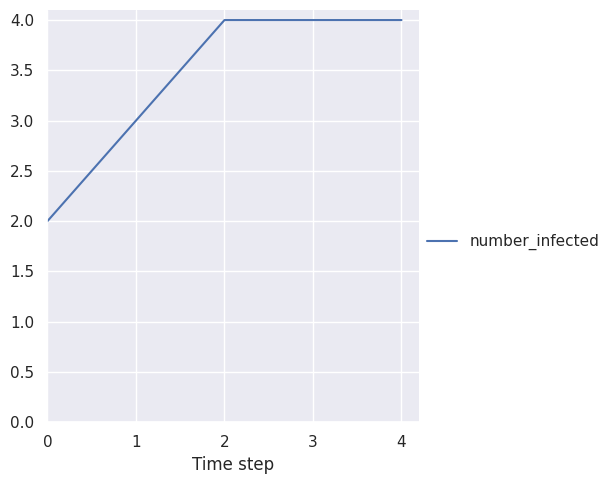

In [14]:
import seaborn as sns

sns.set_theme()

g = sns.relplot(data=summary, kind="line").set(
    xlim=(0,None),
    ylim=(0,None),
)

If you want to save Pandas `DataFrames` to files, there are number of options. The simplest for now is the HDF5 format:

In [15]:
summary.to_hdf("infection_summary.h5", "summary")

In [16]:
new_summary = pd.read_hdf("infection_summary.h5", "summary")
new_summary

number_infected
Time step                 
0                        2
1                        3
2                        4
3                        4
4                        4

But you could also use `DataFrame.to_csv` and `pd.read_csv` if you like.

It's quite common to have one Python script which runs the actual simulation, for example on a powerful HPC system, writing out an `.npz` file. Then another which processes the output on that same large computer to create the summary information as a `.h5` file. Once the data is down to a manageable size, you can then download it to your laptop to produce graphs etc.

### Exercise

Plot the number of infected cells over time for the data from the previous exercise (20 cells for 20 time steps)